In [43]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode

In [44]:
class kNN:
    '''
    k-nearest neighbors classification algorithm class.
    ----------
    Attributes
    ----------
    - k: number of nearest neighbors to be considered.
        Default value is 1.
    - norm: Function. Vector Space Norm. Default
        value is euclidean norm (numpy.linalg.norm).
    - data_X: Data Matrix training set.
    - data_y: Vector of classes. data_X[i,:] class is
        data_y[i].
    '''
    
    def __init__(self, k = 1, norm = np.linalg.norm):
        '''
        Constructor
        ----------
        Paramaters
        ----------
        - k: number of nearest neighbors to be considered.
            Default value is 1.
        - norm: Function. Vector Space Norm. Default
            value is euclidean norm (numpy.linalg.norm).
        '''
        self.k = k
        self.norm = norm
        
    def fit(self, data_X, data_y):
        '''
        Fit function, just save training set.
        ----------
        Paramaters
        ----------
        - data_X: Data Matrix training set.
        - data_y: Vector of classes. data_X[i,:] class is
            data_y[i].
        '''
        self.data_X = data_X
        self.data_y = data_y
        
    def predict(self, test_X):
        '''
        Predict function, execute kNN algorithm.
        ----------
        Paramaters
        ----------
        - test_X: Data Matrix. Function will predict the
            class for each data test_X[i,:].
        
        ------
        Return
        ------
        - test_y: Vector of classes. test_X[i,:] class is
            test_y[i].
        '''
        
        len_test_X = test_X.shape[0]
        distances = []
        test_y = []
        
        for x in self.data_X:
            ''' For each data in training set, it calculates the
                distance between its and each test data. '''
            distances.append(self.norm(test_X - x, axis = 1))
        distances = np.array(distances)
        
        for i in range (0, len_test_X):
            ''' For each test data, it calculates k nearest neighbors
                index, and assings most frequently class. '''
            idx = np.argsort(distances[:,i])
            closestClusters = np.array(self.data_y)[idx]
            closestClusters = closestClusters[0:self.k]
            test_y_mode, _ = mode(closestClusters)
            test_y.append(test_y_mode[0])
        
        return np.array(test_y)
    
    def predict_proba(self, test_X):
        '''
        Predict_proba function, execute kNN algorithm.
        ----------
        Paramaters
        ----------
        - test_X: Data Matrix. Function will predict the
            class for each data test_X[i,:].
        
        ------
        Return
        ------
        - test_y: list of lists of pairs (probabilty, class)
        '''
        
        len_test_X = test_X.shape[0]
        distances = []
        test_y = []
        
        for x in self.data_X:
            ''' For each data in training set, it calculates the
                distance between its and each test data. '''
            distances.append(self.norm(test_X - x, axis = 1))
        distances = np.array(distances)
        
        for i in range (0, len_test_X):
            ''' For each test data, it calculates k nearest neighbors
                index, and assings probabilties based on frequency
                of each class. '''
            idx = np.argsort(distances[:,i])
            closestClusters = np.array(self.data_y)[idx]
            closestClusters = closestClusters[0:self.k]
            test_y_mode = [(closestClusters.tolist().count(j) / self.k, j) for j in set(closestClusters)]
            test_y.append(test_y_mode)
              
        return test_y

In [45]:
def clusterPlot(clusters, x, y):
    '''
    Draw all members of a cluster list and centroids
    
    ----------
    Paramaters
    ----------
    
    - clusters: Clusters list and each cluster is a data Matrix of points
    - x: coordinate x in graphic.
    - y: coordinate y in graphic.
    '''
    for cluster in clusters:
        plt.plot(cluster[:,x], cluster[:,y], 'o')
    plt.show()

Accuracy:  91.16 %


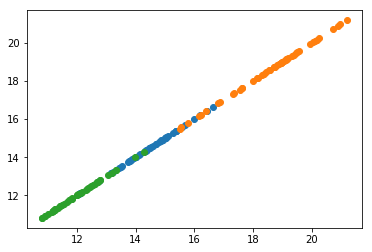

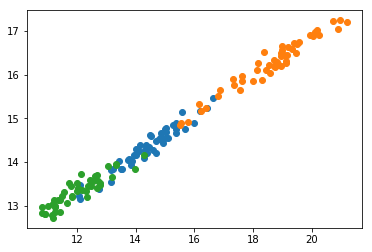

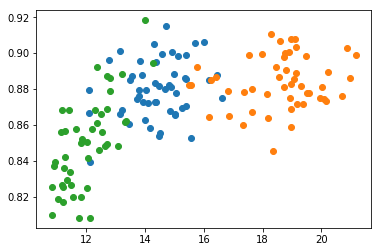

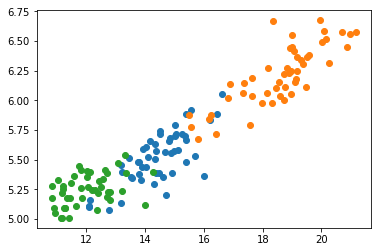

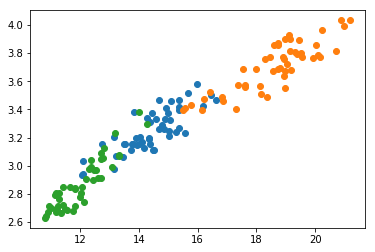

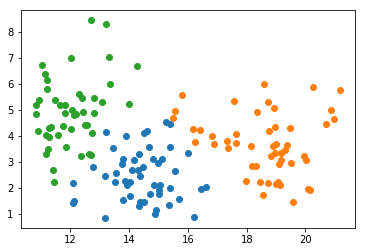

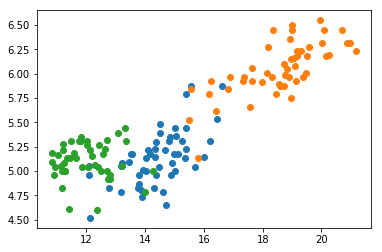

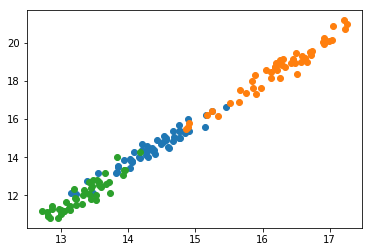

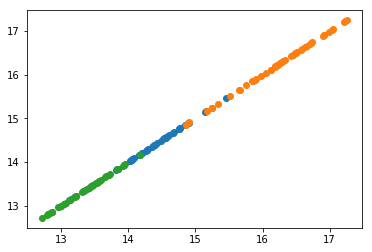

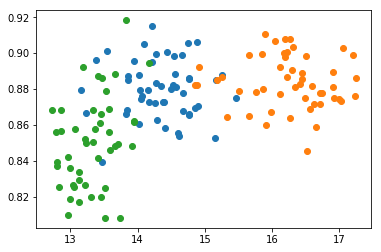

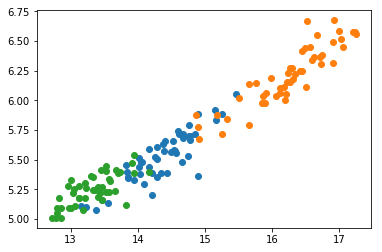

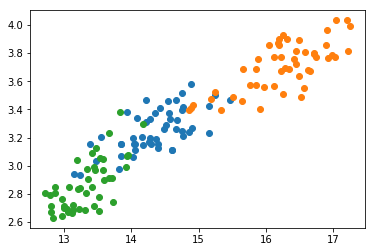

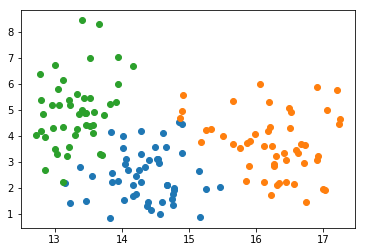

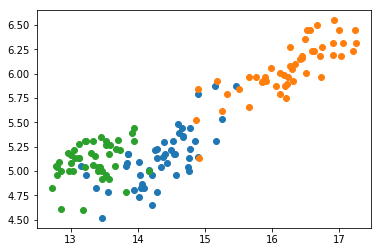

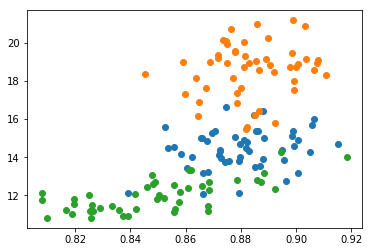

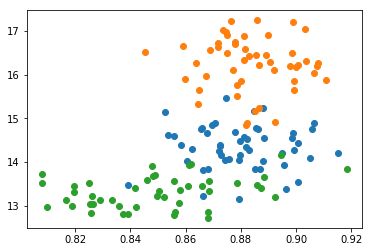

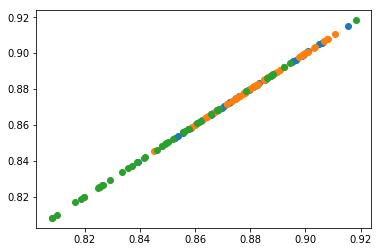

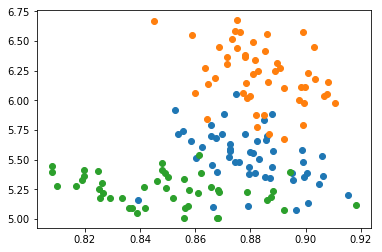

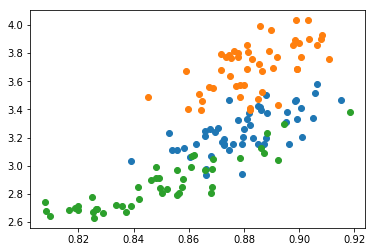

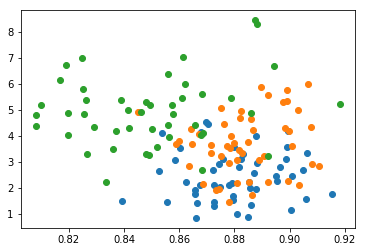

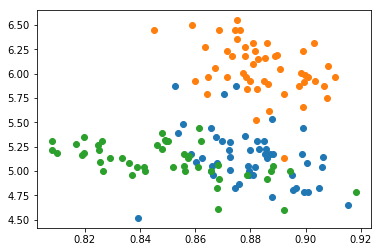

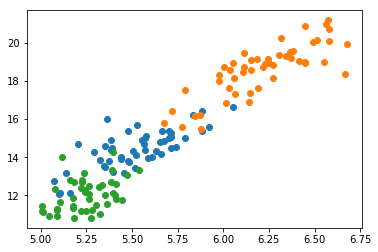

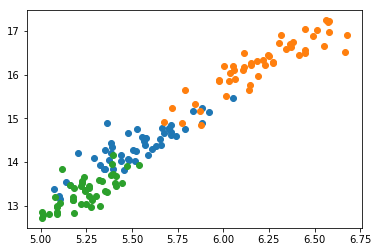

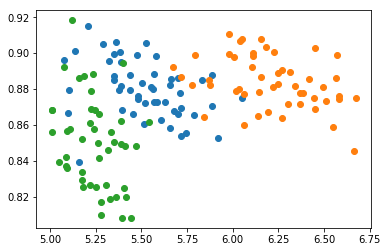

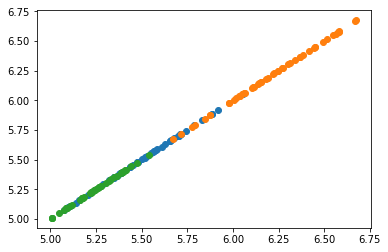

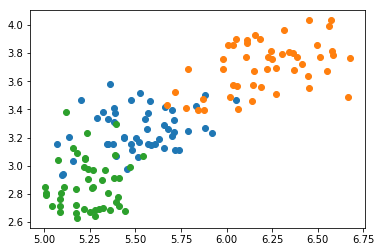

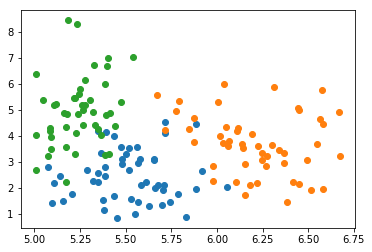

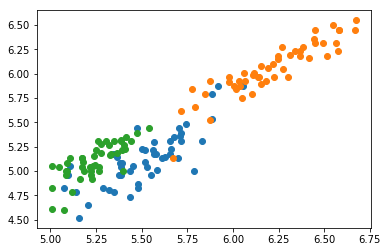

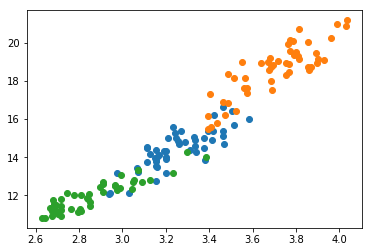

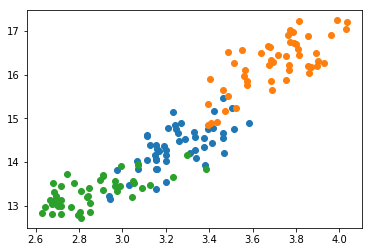

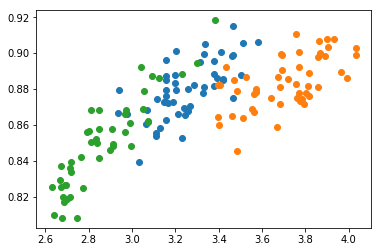

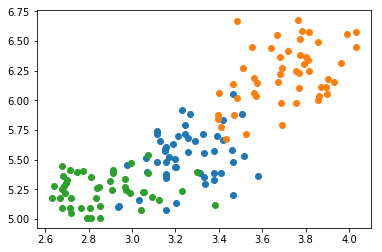

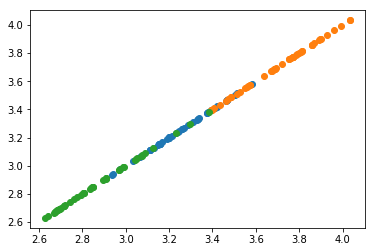

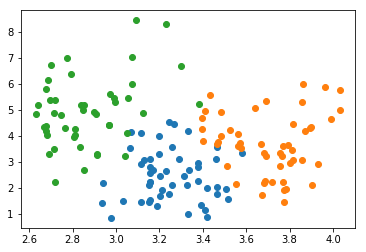

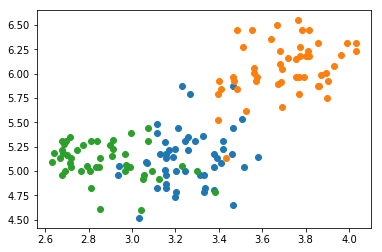

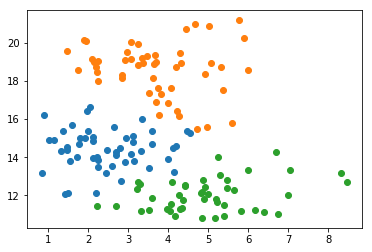

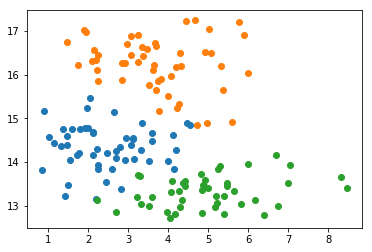

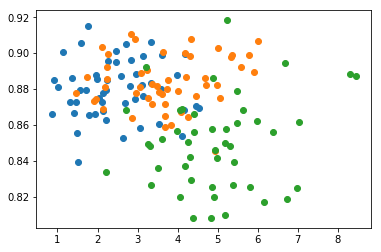

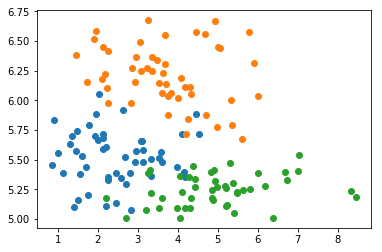

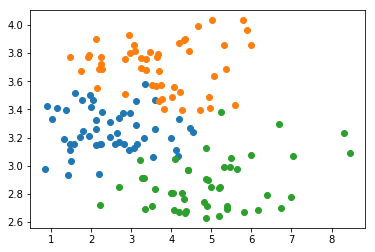

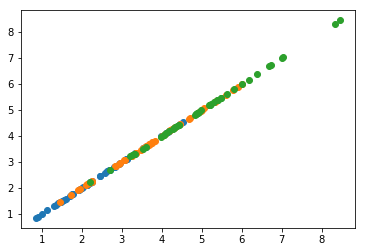

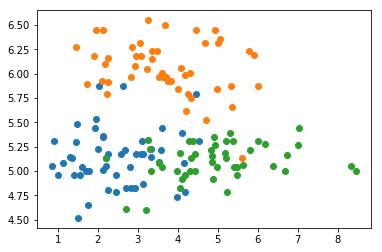

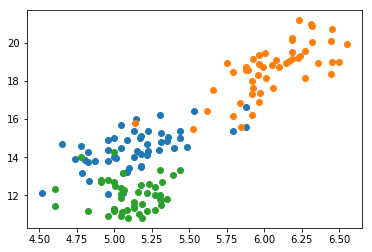

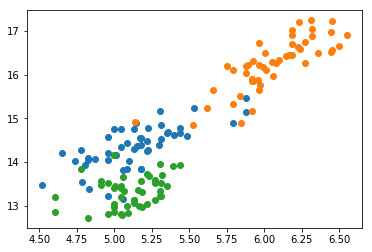

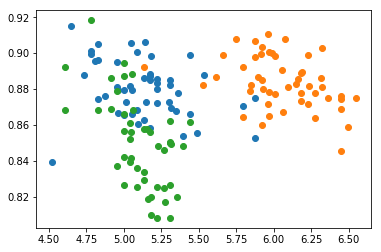

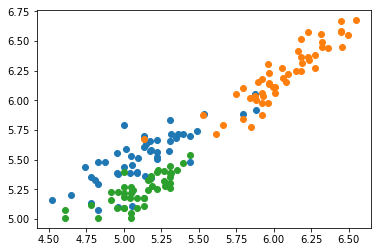

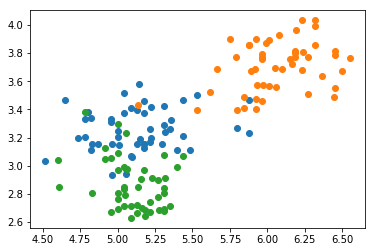

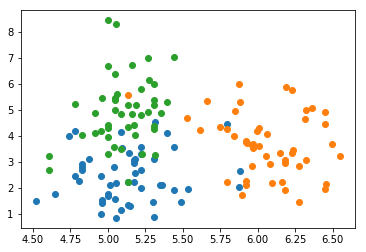

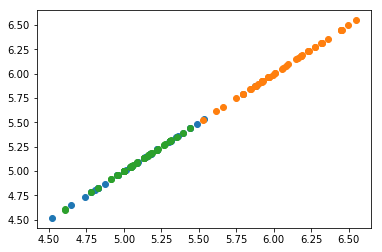

In [59]:
data = pd.read_csv('seeds_dataset.txt')
data = data.values
X = data[:,:-1]
y = data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

model = kNN(5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy: ', np.round(np.mean(y_pred==y_test) * 100, 2),'%')

test = np.column_stack([X_test, y_pred])

classes_set = set(test[:,-1])
classes_set = list(classes_set)
clusters = [[] for i in classes_set]

for x in test:
    for j in range(0, len(classes_set)):
        if x[-1] == classes_set[j]:
            clusters[j].append(x[:-1])
            
clusters = [np.array(c) for c in clusters]
            
for i in range (0,7):
    for j in range (0,7):
        clusterPlot(clusters,i,j)
